## **MKT 7317 Problem Set 1**

#### Jin Miao jxm190071@utdallas.edu

Before getting into start working on this problem set, among other things, please get yourselves familiarized with (i) how to use **@jit** of the **numba** library, and (ii) how to parallelize your code in Python using **joblib**:

In [1]:
from joblib import Parallel, delayed
import time
def f(x):
    time.sleep(2)
    return x**2
results = Parallel(n_jobs=8)(delayed(f)(i) for i in range(10))
results

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

## _1 (Python) Calculating the OLS Estimator for a Multiple Regression_

(a) Load **“cps09mar.csv”** into memory (use either polars or pandas)

In [67]:
from numba import njit
import numpy as np
import pandas as pd
data = pd.read_csv("/home/bizmia/Desktop/Joonhwi/Task1/cps09mar.csv")
data

,age,female,hisp,education,earnings,hours,week,union,uncov,region,race,marital
0,52,0,0,12,146000,45,52,0,0,1,1,1
1,38,0,0,18,50000,45,52,0,0,1,1,1
2,38,0,0,14,32000,40,51,0,0,1,1,1
3,41,1,0,13,47000,40,52,0,0,1,1,1
4,42,0,0,13,161525,50,52,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
50737,58,1,0,11,30000,40,52,0,0,4,4,6
50738,62,1,0,16,35000,40,52,0,0,4,4,6
50739,58,0,0,12,75000,50,52,0,0,4,1,1
50740,45,1,0,12,40000,60,52,0,0,4,1,1


(b) Generate a column of ones, and generate a variable **log_wage** by taking natural loga-
rithm of the variable earnings.

In [3]:
data['ones'] = 1
data['log_wage'] = np.log(data.earnings)
data

,age,female,hisp,education,earnings,hours,week,union,uncov,region,race,marital,ones,log_wage
0,52,0,0,12,146000,45,52,0,0,1,1,1,1,11.891362
1,38,0,0,18,50000,45,52,0,0,1,1,1,1,10.819778
2,38,0,0,14,32000,40,51,0,0,1,1,1,1,10.373491
3,41,1,0,13,47000,40,52,0,0,1,1,1,1,10.757903
4,42,0,0,13,161525,50,52,1,0,1,1,1,1,11.992415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50737,58,1,0,11,30000,40,52,0,0,4,4,6,1,10.308953
50738,62,1,0,16,35000,40,52,0,0,4,4,6,1,10.463103
50739,58,0,0,12,75000,50,52,0,0,4,1,1,1,11.225243
50740,45,1,0,12,40000,60,52,0,0,4,1,1,1,10.596635


(c) Extract the data matrices **y**, **X** as numpy array.

In [4]:
y = data.log_wage.to_numpy()
print(y)
print(type(y))
X = data[['ones','female','education', 'hours']].to_numpy()
print(X)
print(type(X))

[11.8913619  10.81977828 10.37349118 ... 11.22524339 10.59663473
 11.00209984]
<class 'numpy.ndarray'>
[[ 1  0 12 45]
 [ 1  0 18 45]
 [ 1  0 14 40]
 ...
 [ 1  0 12 50]
 [ 1  1 12 60]
 [ 1  0 11 40]]
<class 'numpy.ndarray'>


Now Consider the population regression function:
$$y_i = x_i^{i} \beta + \mu_i$$
where $y_i$ corresponds to the log_wage variable and $x_i$ corresponds to a constant and female,
education, hours variables in the data.

(d) Find the sample size $n$ of this data and column rank $k$ of the matrix $Xs$

In [5]:
n = len(y)
print(n)
k = X.shape[1]
print(k)

50742
4


(e) Calculate the OLS estimator $\hat \beta$ for $\beta$ using the usual closed-form formula 
$$ \hat \beta = (X^{'}X)^{-1} X^{'}y $$

In [6]:
beta_hat = np.linalg.inv( np.transpose(X) @ X ) @ np.transpose(X) @ y
print(beta_hat)

[ 8.57636643 -0.27818095  0.11322532  0.0143364 ]


(e) Calculate the prediction $\hat y_i = x_i^{'} \beta$ for each given sample point $x_i$. Save the prediction
$\hat y = (\hat y_1, \hat y_2, ..., \hat y_n )^{'}$ in memory for future use in the following steps.

In [7]:
y_hat = X @ beta_hat
y_hat

array([10.58020828, 11.25956018, 10.73497691, ..., 10.65189029,
       10.51707335, 10.39530096])

(g) Calculate the residual $\hat \mu_i = y_i - x_i^{'} \hat \beta$ for each given sample point $x_i$. Save the residual vector $\hat{\mu} = (\hat \mu_1, \hat \mu_2, ..., \hat \mu_n )^{'}$ in memory for future use in the following steps.

In [8]:
mu_hat = y - y_hat
mu_hat

array([ 1.31115362, -0.43978189, -0.36148573, ...,  0.5733531 ,
        0.07956139,  0.60679888])

(h) Calculate the standard error of the regression using only basic arithmetic operations and basic matrix
operations

$$ \sqrt{s^2} = \sqrt{ \frac{\mu^{'} \mu}{n - k} } $$

In [9]:
se = np.sqrt(np.transpose(mu_hat) @ mu_hat /(n - k))
se

0.5946986423377512

(i) Calculate $Est.Var \bigg( \hat \beta \bigg| \{ x_k \}_{k = 1}^n \bigg)$ , the estimated covariance matrix of $\hat \beta$ given data, using only basic arithmetic operations and basic matrix operations.

$$ Est.Var \bigg( \hat \beta \bigg| \{ x_k \}_{k = 1}^n \bigg) = s^2 (X^{'}X)^{-1} $$

In [36]:
EstVar = np.diag([se**2] * k) @ np.linalg.inv( np.transpose(X) @ X )
print(EstVar)

[[ 3.80316414e-04 -2.20563037e-05 -1.08539202e-05 -4.85588278e-06]
 [-2.20563037e-05  2.94610568e-05 -3.63149841e-07  3.32459841e-07]
 [-1.08539202e-05 -3.63149841e-07  9.47326121e-07 -4.98008451e-08]
 [-4.85588278e-06  3.32459841e-07 -4.98008451e-08  1.23389119e-07]]


(j) Calculate the **Total Sum of Squares (TSS), Explained Sum of Squares (ESS), Residual
Sum of Squares (RSS)** using only basic arithmetic operations and basic matrix operations.

$$TSS = \sum_{i = 1}^n (y_i - \bar y)^2 $$
$$RSS = \sum_{i = 1}^n (\hat y_i - \bar y)^2 $$
$$ESS = \sum_{i = 1}^n (y_i - \hat y)^2 $$

In [11]:
y_mean = np.sum(y) / n
TSS = np.sum((y - y_mean)**2)
print(TSS)
RSS = np.sum((y_hat - y_mean)**2)
print(RSS)
ESS = np.sum((y - y_hat)**2)
print(ESS)

24960.672254528137
7016.342635913588
17944.329618614618


(k) Calculate $R^2$. Verify that the following is true:
$$ \frac{ESS}{TSS} = 1 - \frac{RSS}{TSS} $$

$R^2 = \frac{RSS}{TSS} = 0.2811$

In [12]:
RSS / TSS

0.2810959001571261

In [13]:
ESS / TSS

0.7189040998428767

In [14]:
1 - RSS / TSS

0.718904099842874

(l) Numerically calculate $\sum_{i = 1}^n \hat \mu_i $ and $\sum_{i = 1}^n \hat \mu_i x_i $. Compare your results with the theoretical
results.

_Theoretical Results_

$\sum_{i = 1}^n \hat \mu_i = \sum_{i = 1}^n (y_i - \hat y_i) = \sum_{i = 1}^n (y_i - x_i^{'} \hat \beta) = 0 $


$\sum_{i = 1}^n \hat \mu_i x_i = \sum_{i = 1}^n (y_i - \hat y_i) x_i = X^{'} \bigg(y - X(X^{'}X)^{-1}X^{'}y \bigg) = 0 $

_Numerical Results_

In [15]:
np.sum(mu_hat)

-7.379838962151553e-10

In [16]:
out = np.transpose(X) * mu_hat
out.sum(axis = 1)

array([-7.37983896e-10, -6.00280714e-10, -1.10322844e-08, -3.40678525e-08])

(m) Construct the t-statistic corresponding to $H_0: c^{'} \beta = 0$ vs. $H_1: c^{'} \beta \neq 0$ for the
following $c$s, respectively, and calculate the corresponding p-values.

$$ c = 
\begin{pmatrix}
1 \\ 
0 \\
0 \\
0
\end{pmatrix}, 
c = 
\begin{pmatrix}
0 \\ 
1 \\
0 \\
0
\end{pmatrix}, 
c = 
\begin{pmatrix}
0 \\ 
0 \\
1 \\
0
\end{pmatrix}, 
c = 
\begin{pmatrix}
0 \\ 
0 \\
0 \\
1
\end{pmatrix}
$$

Denote $ \beta = 
\begin{pmatrix}
\beta_1 \\ 
\beta_2 \\
\beta_3 \\
\beta_4
\end{pmatrix}
$, we have the limiting distribution of $c^{'} \hat \beta$ under $H_0$ as

$$ 
c^{'} \hat \beta \rightarrow^{d} N \bigg(0, c^{'}  EstVar(\hat \beta) c \bigg)
$$

The corresponding t-statistics are 

$$ t_i = \frac{\hat \beta_i}{ se(\hat \beta_i)}, i \in \{ 1, 2, 3, 4 \} $$
where the standard error of the corresponding estimates are calculated from the diagonal elements of the estimated variance-covariance matrix. 

In [24]:
t_0 = beta_hat[0] / np.sqrt(EstVar[0,0])
t_1 = beta_hat[1] / np.sqrt(EstVar[1,1])
t_2 = beta_hat[2] / np.sqrt(EstVar[2,2])
t_3 = beta_hat[3] / np.sqrt(EstVar[3,3])

The corresponding p-values are shown as follows:

In [31]:
from scipy.stats import norm
p_0 = 2 * (1 - norm.cdf( np.abs(t_0)))
p_1 = 2 * (1 - norm.cdf( np.abs(t_1)))
p_2 = 2 * (1 - norm.cdf( np.abs(t_2)))
p_3 = 2 * (1 - norm.cdf( np.abs(t_3)))

In [35]:
print('t-statistic = %6.3f p-value = %6.4f' % (t_0, p_0))
print('t-statistic = %6.3f p-value = %6.4f' % (t_1, p_1))
print('t-statistic = %6.3f p-value = %6.4f' % (t_2, p_2))
print('t-statistic = %6.3f p-value = %6.4f' % (t_3, p_3))

t-statistic = 439.775 p-value = 0.0000
t-statistic = -51.251 p-value = 0.0000
t-statistic = 116.331 p-value = 0.0000
t-statistic = 40.813 p-value = 0.0000


(n) Construct the t-statistic corresponding to $H_0: c^{'} \beta = 1$ vs. $H_1: c^{'} \beta \neq 1$ for the
following $c$ and calculate the corresponding p-values.

$$c = 
\begin{pmatrix}
1 \\ 
1 \\
1 \\
1
\end{pmatrix}
$$

Given $ c = 
\begin{pmatrix}
1 \\ 
1 \\
1 \\
1
\end{pmatrix}
$, we have the limiting distribution of $c^{'} \hat \beta$ under $H_0$ as

$$ 
c^{'} \hat \beta \rightarrow^{d} N \bigg(0, c^{'}  EstVar(\hat \beta) c \bigg)
$$

The corresponding t-statistic is 

$$ t = \frac{c^{'} \hat \beta}{ \sqrt{c^{'}  EstVar(\hat \beta) c} } $$


In [44]:
c = np.ones(4)
se = np.sqrt(c @ EstVar @ np.transpose(c))
t = c @ beta_hat / se

The corresponding p-value is

In [45]:
p = 2 * (1 - norm.cdf( np.abs(t)))
print('t-statistic = %6.3f p-value = %6.4f' % (t, p))

t-statistic = 460.241 p-value = 0.0000


(o) Now consider minimizing the objective function numerically using IPOPT:

$$ \min_{\beta} \sum_{i = 1}^n (y_i - x_i^{'} \beta)^2$$

Solve the following problem numerically with cyIPOPT by **(i) supplying only objective function and gradient to cyIPOPT**

In [47]:
import cyipopt

class ols:

    def __init__(self):
        pass

    def objective(self, beta):
        #
        # The callback for calculating the objective
        #
        return np.transpose(y - X @ beta) @ (y - X @ beta)

    def gradient(self, beta):
        #
        # The callback for calculating the gradient
        #
        return -2 * np.transpose(X) @ y + 2 * np.transpose(X) @ X @ beta

    def intermediate(
            self,
            alg_mod,
            iter_count,
            obj_value,
            inf_pr,
            inf_du,
            mu,
            d_norm,
            regularization_size,
            alpha_du,
            alpha_pr,
            ls_trials
            ):

        #
        # Example for the use of the intermediate callback.
        #
        print("Objective value at iteration #%d is - %g" % (iter_count, obj_value))


def main():
    #
    # Define the problem
    #
    x0 = [0.0, 0.0, 0.0, 0.0]

    # lb = [1.0, 1.0, 1.0, 1.0]
    # ub = [5.0, 5.0, 5.0, 5.0]

    cl = []
    # cu = []

    nlp = cyipopt.Problem(
        n=len(x0),
        m=len(cl),
        problem_obj=ols(),
        # lb=lb,
        # ub=ub,
        # cl=cl,
        # cu=cu
        )

    #
    # Set solver options
    #
    #nlp.addOption('derivative_test', 'second-order')
    nlp.add_option('mu_strategy', 'adaptive')
    nlp.add_option('tol', 1e-7)
    nlp.add_option('linear_solver', 'ma57')
    nlp.add_option('hessian_approximation', 'limited-memory')
    
    #
    # Scale the problem (Just for demonstration purposes)
    #
    nlp.set_problem_scaling(
        obj_scaling=2,
        x_scaling=[1, 1, 1, 1]
        )
    nlp.add_option('nlp_scaling_method', 'user-scaling')

    #
    # Solve the problem
    #
    x, info = nlp.solve(x0)

    print("Solution of the primal variables: x=%s\n" % repr(x))
    print("Solution of the dual variables: lambda=%s\n" % repr(info['mult_g']))
    print("Objective=%s\n" % repr(info['obj_val']))

if __name__ == '__main__':
    main()


Objective value at iteration #0 is - 5.79418e+06
Objective value at iteration #1 is - 2.47222e+06
Objective value at iteration #2 is - 136348
Objective value at iteration #3 is - 134232
Objective value at iteration #4 is - 86137.6
Objective value at iteration #5 is - 85868.6
Objective value at iteration #6 is - 34961.8
Objective value at iteration #7 is - 30985.8
Objective value at iteration #8 is - 18713.6
Objective value at iteration #9 is - 18631.3
Objective value at iteration #10 is - 17991
Objective value at iteration #11 is - 17957.4
Objective value at iteration #12 is - 17945.6
Objective value at iteration #13 is - 17944.8
Objective value at iteration #14 is - 17944.6
Objective value at iteration #15 is - 17944.6
Objective value at iteration #16 is - 17944.4
Objective value at iteration #17 is - 17944.3
Objective value at iteration #18 is - 17944.3
Objective value at iteration #19 is - 17944.3
Objective value at iteration #20 is - 17944.3
Objective value at iteration #21 is - 17

Solve the following problem numerically with cyIPOPT by **(ii) supplying objective function, gradient, hessian althogether respectively**

In [48]:
import cyipopt

class ols:

    def __init__(self):
        pass

    def objective(self, beta):
        #
        # The callback for calculating the objective
        #
        return np.transpose(y - X @ beta) @ (y - X @ beta)

    def gradient(self, beta):
        #
        # The callback for calculating the gradient
        #
        return - 2 * np.transpose(X) @ y + 2 * np.transpose(X) @ X @ beta

    def hessianstructure(self):
        return np.nonzero(np.tril(np.ones((4, 4))))

    def hessian(self, beta, lagrange, obj_factor):
        #
        # The callback for calculating the Hessian
        #
        
        H = 2 * np.transpose(X) @ X 
        row, col = self.hessianstructure()
        return H[row, col]

    def intermediate(
            self,
            alg_mod,
            iter_count,
            obj_value,
            inf_pr,
            inf_du,
            mu,
            d_norm,
            regularization_size,
            alpha_du,
            alpha_pr,
            ls_trials
            ):

        #
        # Example for the use of the intermediate callback.
        #
        print("Objective value at iteration #%d is - %g" % (iter_count, obj_value))


def main():
    #
    # Define the problem
    #
    x0 = [0.0, 0.0, 0.0, 0.0]

    # lb = [1.0, 1.0, 1.0, 1.0]
    # ub = [5.0, 5.0, 5.0, 5.0]

    cl = []
    # cu = []

    nlp = cyipopt.Problem(
        n=len(x0),
        m=len(cl),
        problem_obj=ols(),
        # lb=lb,
        # ub=ub,
        # cl=cl,
        # cu=cu
        )

    #
    # Set solver options
    #
    #nlp.addOption('derivative_test', 'second-order')
    nlp.add_option('mu_strategy', 'adaptive')
    nlp.add_option('tol', 1e-7)
    nlp.add_option('linear_solver', 'ma57')
    nlp.add_option('hessian_approximation', 'exact')
    #
    # Scale the problem (Just for demonstration purposes)
    #
    nlp.set_problem_scaling(
        obj_scaling=2,
        x_scaling=[1, 1, 1, 1]
        )
    nlp.add_option('nlp_scaling_method', 'user-scaling')

    #
    # Solve the problem
    #
    x, info = nlp.solve(x0)

    print("Solution of the primal variables: x=%s\n" % repr(x))

    print("Solution of the dual variables: lambda=%s\n" % repr(info['mult_g']))

    print("Objective=%s\n" % repr(info['obj_val']))


if __name__ == '__main__':
    main()


Objective value at iteration #0 is - 5.79418e+06
Objective value at iteration #1 is - 17944.3
Solution of the primal variables: x=array([ 8.57636643, -0.27818095,  0.11322532,  0.0143364 ])

Solution of the dual variables: lambda=array([], dtype=float64)

Objective=17944.32961861461



**The estimation results coincide. However, the provision of Hession matrix enables the estimation procedure to be completed using 1 iteration whereas no-Hession procedure takes 32 iterations.**

## _2 (Python) (Weak) Law of Large Numbers_

(a) Consider a continuous random variable $X_i \sim Uniform[0,2]$. What is $E[X_i]$ and $Var[X_i]$?

$$
E[X_i] = 1
$$
$$
Var[X_i] = \frac{1}{3}
$$

(b) Consider the $X_i$ defined above in (a) for $i = 1, 2, ..., n$, where each $X_i$ is uncorrelated with $X_j$ whenever $i \neq j$. Consider the sample mean

$$\bar X_n = \frac{1}{n} \sum_{i = 1}^n X_i$$

What is $E[\bar X_n]$ and $Var[\bar X_n]$?

$$
E[\bar X_n] = E[\frac{1}{n} \sum_{i = 1}^n X_i] = \frac{1}{n} \sum_{i = 1}^n E[X_i] = 1
$$
$$
Var[\bar X_n] = Var[\frac{1}{n} \sum_{i = 1}^n X_i] = \frac{1}{n^2} Var[\sum_{i = 1}^n X_i] = \frac{1}{n^2} \sum_{i = 1}^n Var[X_i] = \frac{1}{3n}
$$

Now repeat the following (c) -- (e) for $n = 1, 2, 3, 5, 10, 50, 100, 1000, 3000$. Parallelize your routine
for (c)-(e) using **joblib**.

(c) (Python) Generate a size n vector of independent $Uniform[0,2]$ random variables and
calculate its sample mean $\bar X_n$.

In [52]:
Parallel(n_jobs = 4)(delayed(np.mean)(np.random.uniform(low = 0.0, high = 2.0, size = n)) for n in [1, 2, 3, 5, 10, 50, 100, 1000, 3000])

[1.7387544054429662,
 0.7392505938565506,
 0.6635113910060212,
 0.6859239385552426,
 0.947328337980912,
 0.9110062068162784,
 0.9364244622737868,
 0.9490319125998721,
 1.0071548869618632]

In [69]:
from joblib import Parallel, delayed
def g(n):
    X = np.random.uniform(low = 0.0, high = 2.0, size = n) 
    return np.mean(X)
Parallel(n_jobs = 4)(delayed(g)(i) for i in [1, 2, 3, 5, 10, 50, 100, 1000, 3000])

[0.034142175618047776,
 0.5827407508458287,
 1.345585132810884,
 1.1633795537727685,
 1.1690230682718448,
 1.0531873641422955,
 1.0851970204911148,
 0.9938896852350781,
 1.0148289604454663]

(d) (Python) Take $| \bar X_n - E[X_i] |$ and report the value.

In [55]:
def g(n):
    X = np.random.uniform(low = 0.0, high = 2.0, size = n) 
    return np.abs(np.mean(X) - 1)
Parallel(n_jobs = 4)(delayed(g)(i) for i in [1, 2, 3, 5, 10, 50, 100, 1000, 3000])

[0.7747693776948006,
 0.6332782329729536,
 0.5292861355638434,
 0.08373686096086763,
 0.30864512685100165,
 0.14845296280222986,
 0.07883253575548121,
 0.007513979186786868,
 0.018878222341412343]

(e) (Python) Now consider a continuous transformation


$$f(x) = 2 x^2 - 5x + 1 + \frac{1}{3x}$$

Take $| f(\bar X_n) - f(E[X_i]) |$ and report the value.

In [60]:
def g(n):
    def f(x):
        return 2 * x**2 - 5 * x + 1 + 1/(3 * x)
    X = np.random.uniform(low = 0.0, high = 2.0, size = n) 
    return np.abs(f(np.mean(X)) - f(1))
Parallel(n_jobs = 4)(delayed(g)(i) for i in [1, 2, 3, 5, 10, 50, 100, 1000, 3000])

[7.331767642457973,
 0.20797514334874,
 0.17733577294629477,
 0.19506113992616791,
 0.19129188572236466,
 0.007508382368210498,
 0.03257419189835686,
 0.029788710360908466,
 0.007138355425688969]

(f) What happens to the reported value in (d) and (e) as n increases? Discuss.

$| \bar X_n - E[X_i] |$ converges to 0 as n increases. 

$| f(\bar X_n) - f(E[X_i]) |$ converges to 0 as n increases. 

## _3 (Python) Central Limit Theorem_

(a) Consider a continuous random variable $X_i \sim Uniform[0,2]$. What is $E[X_i]$ and $Var[X_i]$?

$$
E[X_i] = 1
$$
$$
Var[X_i] = \frac{1}{3}
$$

(b) Consider the $X_i$ defined above in (a) for $i = 1, 2, ..., n$, where each $X_i$ is uncorrelated with $X_j$ whenever $i \neq j$. Consider the sample mean

$$\bar X_n = \frac{1}{n} \sum_{i = 1}^n X_i$$

What is $E[\bar X_n]$ and $Var[\bar X_n]$?

$$
E[\bar X_n] = E[\frac{1}{n} \sum_{i = 1}^n X_i] = \frac{1}{n} \sum_{i = 1}^n E[X_i] = 1
$$
$$
Var[\bar X_n] = Var[\frac{1}{n} \sum_{i = 1}^n X_i] = \frac{1}{n^2} Var[\sum_{i = 1}^n X_i] = \frac{1}{n^2} \sum_{i = 1}^n Var[X_i] = \frac{1}{3n}
$$

(c) Consider the transformation

$$Y_n = \sqrt{n} (\bar X_n - E[X_i]) $$

What is $E[Y_n]$ and $Var[Y_n]$?

$$
E[Y_n] = E[\sqrt{n} (\bar X_n - E[X_i])] = \sqrt{n} E[(\bar X_n - E[X_i])]  = 0
$$
$$
Var[Y_n] = Var[\sqrt{n} (\bar X_n - E[X_i])] = n Var[\bar X_n] = \frac{1}{3}
$$

(d) Consider the transformation

$$Z_n = \sqrt{n} \frac{\bar X_n - E[X_i]}{\sqrt{Var[X_i]}} $$

What is $E[Z_n]$ and $Var[Z_n]$?

$$
E[Z_n] = E\bigg[\sqrt{n} \frac{\bar X_n - E[X_i]}{\sqrt{Var[X_i]}} \bigg] = E\bigg[\sqrt{n} \frac{\bar X_n - 1}{\sqrt{ \frac{1}{3} }} \bigg] = 0
$$
$$
Var[Z_n] = Var\bigg[\sqrt{n} \frac{\bar X_n - E[X_i]}{\sqrt{Var[X_i]}} \bigg] = 3n Var[\bar X_n - 1] = 1
$$

Now repeat the following for $n = 1, 2, 3, 5, 10, 50, 100, 1000, 3000$. Parallelize your routine
for (e)-(m) using **joblib**.

(e) (Python) Generate $t = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ..., 2500$ $n × 1$ vectors of independent
$Uniform[0,2]$ random variables and calculate its sample mean $\bar X_n^t$ respectively for each $t$.
Denote this size 2500 vector as
$$v_n^{2500} = \bigg( \bar X_n^1, \bar X_n^2, ..., \bar X_n^{2500} \bigg)$$
for now.

In [75]:
def g(n):
    X = np.random.uniform(low = 0.0, high = 2.0, size = n) 
    v = [0] * 2500
    for i in range(2500):
        v[i] = np.mean( np.random.uniform(low = 0.0, high = 2.0, size = n) )
    return v
Parallel(n_jobs = 4)(delayed(g)(i) for i in [1, 2, 3, 5, 10, 50, 100, 1000, 3000])

[[1.9088488414971774,
  0.8789585570515848,
  1.2675427803285162,
  0.4411521302297272,
  1.5850361632597625,
  1.4293828277615181,
  0.8544330532725632,
  0.2535785230020404,
  0.03393276491510511,
  1.5816272419851118,
  0.2483648673541714,
  1.4796937404446382,
  1.4925769502280541,
  1.8851162890283009,
  0.930447450923412,
  1.1406090299698597,
  1.5547554588560555,
  0.5444219468553577,
  1.1121696419090958,
  1.9597222519760216,
  1.3457647068475358,
  1.2365374960419664,
  0.8981232844509561,
  0.015914072421126857,
  1.3404461545551398,
  1.6199149696808597,
  1.0071804646338063,
  1.6292434038119656,
  0.12499042719499842,
  0.7898803835957797,
  0.5910753175847654,
  0.8508284891246194,
  1.6264446081296997,
  0.6183994696604629,
  1.8134632339160883,
  0.800933772197326,
  1.4790614217876066,
  1.0201235661662702,
  0.1705655821993748,
  1.1843683164794032,
  0.3920133101675518,
  1.728792524313474,
  1.7577252770468534,
  1.5163808240634453,
  1.4330129977809325,
  1.66779

(f) (Python) Calculate the mean and variance of $v^{2500}$ and report.

In [78]:
def g(n):
    X = np.random.uniform(low = 0.0, high = 2.0, size = n) 
    v = [0] * 2500
    for i in range(2500):
        v[i] = np.mean( np.random.uniform(low = 0.0, high = 2.0, size = n) )
    return ('n = %6.0f mean = %6.6f variance = %6.6f' % (n, np.mean(v), np.var(v)))
Parallel(n_jobs = 4)(delayed(g)(i) for i in [1, 2, 3, 5, 10, 50, 100, 1000, 3000])

['n =      1 mean = 0.980212 variance = 0.338414',
 'n =      2 mean = 0.986872 variance = 0.164377',
 'n =      3 mean = 1.004846 variance = 0.112812',
 'n =      5 mean = 1.004871 variance = 0.069938',
 'n =     10 mean = 1.002434 variance = 0.034188',
 'n =     50 mean = 1.001709 variance = 0.006451',
 'n =    100 mean = 0.998040 variance = 0.003336',
 'n =   1000 mean = 0.999674 variance = 0.000356',
 'n =   3000 mean = 0.999925 variance = 0.000111']

**This numerical output is consistent with the theoretical results from (b).**

(g) (Python) Recall that each element of $v_n^{2500}$ is composed of $\bar X_n^t$ for $t = 1, ..., 2500$. Now,
for each $t = 1, 2, ..., 2500$, take the transformation
$$
Y_n^t = \sqrt{n} (\bar X_n^t - E[X_i]) 
$$
and denote the transformed vector as
$$
y_n^{2500} = \bigg( Y_n^1, Y_n^2, ..., Y_n^{2500}   \bigg)
$$
That is, subtract the $E [ X_i ]$ (that you calculated in (a)) from each element of $v_n^{2500}$, and then
multiply it by $\sqrt{n}$, and then denote it by $y_n^{2500}$.

In [90]:
def g(n):
    X = np.random.uniform(low = 0.0, high = 2.0, size = n) 
    y = [0] * 2500
    for i in range(2500):
        y[i] = (np.mean( np.random.uniform(low = 0.0, high = 2.0, size = n) ) - 1) * np.sqrt(n)
    return y
Parallel(n_jobs = 4)(delayed(g)(i) for i in [1, 2, 3, 5, 10, 50, 100, 1000, 3000])

[[0.5741370018461451,
  0.7056826286021189,
  0.8340935770650406,
  0.4875643732873156,
  0.7268298597454017,
  0.01748801861654181,
  0.7103550905934539,
  -0.2686745434105746,
  0.9896575535337138,
  0.7501964728994994,
  0.6899267233967208,
  0.5094428372502047,
  0.9230365923426103,
  -0.8075988020795275,
  -0.0658165871623726,
  0.5595091993366756,
  0.024922538540535166,
  -0.35064600520192624,
  0.8209559974857168,
  -0.22166996339724476,
  0.2782735936829712,
  0.7805317326084285,
  0.12122703761941889,
  -0.7463903291834404,
  0.8126582570502794,
  0.4567635957293268,
  -0.36981112810634564,
  0.11193525131313908,
  -0.5596947210511585,
  0.57704578636033,
  -0.3464825204512727,
  -0.06518992074870122,
  0.3564744472626915,
  -0.6606963068259102,
  -0.063813951748946,
  0.5765414279194676,
  0.8020221160865018,
  -0.3845947911065575,
  0.5789438330248473,
  0.7149684835913193,
  0.5472647269181792,
  -0.3614588296065002,
  0.9838718247535898,
  0.28093442740704,
  0.4363361136

(h) (Python) Calculate the mean and variance of $y^{2500}$ and report.

In [94]:
def g(n):
    X = np.random.uniform(low = 0.0, high = 2.0, size = n) 
    y = [0] * 2500
    for i in range(2500):
        y[i] = (np.mean( np.random.uniform(low = 0.0, high = 2.0, size = n) ) - 1) * np.sqrt(n)
    return ('n = %6.0f mean = %6.6f variance = %6.6f' % (n, np.mean(y), np.var(y)))
Parallel(n_jobs = 4)(delayed(g)(i) for i in [1, 2, 3, 5, 10, 50, 100, 1000, 3000])

['n =      1 mean = -0.006991 variance = 0.336927',
 'n =      2 mean = 0.013185 variance = 0.321992',
 'n =      3 mean = 0.017650 variance = 0.333371',
 'n =      5 mean = 0.015202 variance = 0.329535',
 'n =     10 mean = 0.006186 variance = 0.329514',
 'n =     50 mean = 0.004827 variance = 0.322368',
 'n =    100 mean = 0.000278 variance = 0.339537',
 'n =   1000 mean = 0.011801 variance = 0.329069',
 'n =   3000 mean = 0.002221 variance = 0.326682']

**This numerical output is consistent with the theoretical results from (c).**

(i) (Python) Plot the histogram of $y^{2500}$ and report.

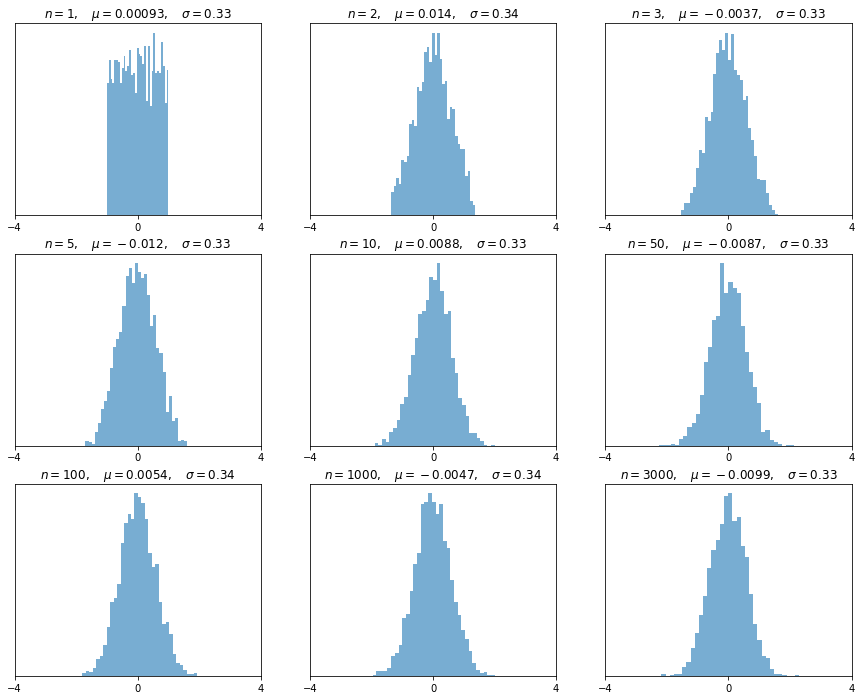

In [128]:
num_rows, num_cols = 3, 3
SizeList = [1, 2, 3, 5, 10, 50, 100, 1000, 3000]
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
for i in range(num_cols):
    for j in range(num_rows):
        index = i + 3 * j
        
        X = np.random.uniform(low = 0.0, high = 2.0, size = SizeList[index]) 
        y = [0] * 2500
        for k in range(2500):
            y[k] = (np.mean( np.random.uniform(low = 0.0, high = 2.0, size = SizeList[index]) ) - 1) * np.sqrt(SizeList[index])
        
        axes[j,i].hist(y, alpha = 0.6, bins = 33)
        t = f'$n = {SizeList[index]}, \quad \mu = {np.mean(y):.2}, \quad \sigma = {np.var(y):.2}$'
        axes[j,i].set(title = t, xticks = [-4, 0, 4], yticks = [])

plt.show()

(j) (Python) Recall that each element of $v_n^{2500}$ is composed of $\bar X_n^t$ for $t = 1, ..., 2500$. Now,
take the transformation
$$
Z_n^t = \sqrt{n} \frac{\bar X_n^t - E[X_i]}{\sqrt{Var(X_i)}}
$$
and denote the transformed vector as $z_n^{2500}$. 
That is, subtract the $E [ X_i ]$ (that you calculated in (a)) from each element of $v_n^{2500}$, and then
multiply it by $\sqrt{n}$, and divide it by $\sqrt{Var(X_i)}$ ($\sqrt{Var(X_i)}$ you calculated in (a)) , and then denote it by 
$$
z_n^{2500} = \bigg(Z_n^1, Z_n^2, ..., Z_n^{2500}\bigg)
$$.

In [95]:
def g(n):
    X = np.random.uniform(low = 0.0, high = 2.0, size = n) 
    y = [0] * 2500
    for i in range(2500):
        y[i] = (np.mean( np.random.uniform(low = 0.0, high = 2.0, size = n) ) - 1) * np.sqrt(3 * n)
    return y
Parallel(n_jobs = 4)(delayed(g)(i) for i in [1, 2, 3, 5, 10, 50, 100, 1000, 3000])

[[-1.7043068392658776,
  -1.4462820570571095,
  0.00752370065696744,
  1.1728594028504347,
  0.9112980127007316,
  -1.6471734456092646,
  1.5620106155929652,
  0.4204681110400953,
  -1.0994766057688679,
  -0.850792080643496,
  -0.9553060879010102,
  0.9264417930623383,
  -1.0808680299092432,
  0.13688176378863487,
  -0.23847119779388448,
  1.0066620365589944,
  -0.5223156087820852,
  -0.08205748943329129,
  -0.1332074472773152,
  -1.4830550923099357,
  -0.5800085121190826,
  -1.1005668924428114,
  0.48005370707003964,
  0.9872712454044065,
  0.7083302771491078,
  -0.5567731154432483,
  1.368238463392633,
  -0.9929642634492605,
  1.4479326956975491,
  1.4491439932689028,
  0.8521039745571674,
  -1.037704490655183,
  0.9837878615142674,
  -1.085411988830346,
  -0.25902350573500804,
  0.8334416408652043,
  1.0441956206959226,
  -0.8641044343253191,
  0.36607885038343857,
  -1.0296357402483833,
  -1.220353018118707,
  0.32775962640245326,
  1.5039071420670316,
  -0.9002380037886758,
  0.70

(k) (Python) Calculate the mean and variance of $z^{2500}$ and report.

In [97]:
def g(n):
    X = np.random.uniform(low = 0.0, high = 2.0, size = n) 
    y = [0] * 2500
    for i in range(2500):
        y[i] = (np.mean( np.random.uniform(low = 0.0, high = 2.0, size = n) ) - 1) * np.sqrt(3 * n)
    return ('n = %6.0f mean = %6.6f variance = %6.6f' % (n, np.mean(y), np.var(y)))
Parallel(n_jobs = 4)(delayed(g)(i) for i in [1, 2, 3, 5, 10, 50, 100, 1000, 3000])

['n =      1 mean = 0.024791 variance = 0.989388',
 'n =      2 mean = -0.026935 variance = 1.042139',
 'n =      3 mean = -0.000731 variance = 0.982621',
 'n =      5 mean = -0.014449 variance = 0.988907',
 'n =     10 mean = 0.033758 variance = 0.988097',
 'n =     50 mean = 0.020300 variance = 0.950563',
 'n =    100 mean = 0.007834 variance = 1.007516',
 'n =   1000 mean = 0.009767 variance = 1.034636',
 'n =   3000 mean = 0.011749 variance = 0.970406']

**This numerical output is consistent with the theoretical results from (d).**

(l) (Python) Plot the histogram of $z^{2500}$ and report.

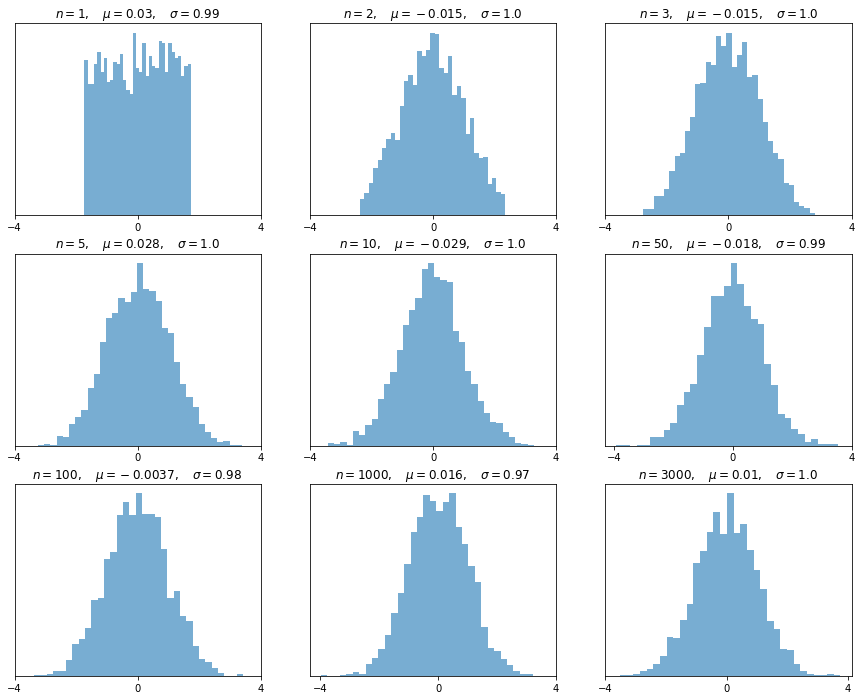

In [129]:
num_rows, num_cols = 3, 3
SizeList = [1, 2, 3, 5, 10, 50, 100, 1000, 3000]
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
for i in range(num_rows):
    for j in range(num_cols):
        index = i + 3 * j
        
        X = np.random.uniform(low = 0.0, high = 2.0, size = SizeList[index]) 
        y = [0] * 2500
        for k in range(2500):
            y[k] = (np.mean( np.random.uniform(low = 0.0, high = 2.0, size = SizeList[index]) ) - 1) * np.sqrt(3 * SizeList[index])
        
        axes[j,i].hist(y, alpha = 0.6, bins = 33)
        t = f'$n = {SizeList[index]}, \quad \mu = {np.mean(y):.2}, \quad \sigma = {np.var(y):.2}$'
        axes[j,i].set(title = t, xticks = [-4, 0, 4], yticks = [])

plt.show()

(m) What happens to the reported values in (f), (h), (k) and histograms in (i) and (l) as n
increases? Discuss.

**(f) $v^{2500} = \bigg( \bar X_n^1, \bar X_n^2, ..., \bar X_n^{2500} \bigg)$ converges to the mass point of $E[\bar X_n] = 1$ as n increases.**

**(h) $y_n^{2500} = \bigg( Y_n^1, Y_n^2, ..., Y_n^{2500} \bigg)$ converges to $N(0, \frac{1}{3})$ as n increases.**

**(k) $z_n^{2500} = \bigg(Z_n^1, Z_n^2, ..., Z_n^{2500}\bigg)$ converges to $N(0, 1)$ as n increases.**

**(i) (l) The simulated distributions get smoother and closer to the limiting Normal distributions as n increases.** 


## _4 (Python) WLLN with Simple Regression_##

In this exercise, you will generate datasets for simple regression yourself, and then try to esti-
mate the model parmaters to examine the properties of simple regression OLS estimators as the
sample size $n$ grows.

Repeat the following for $n = 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 50, 75, 100, 250, 500, 1000, 2000, 3000$.
Parallelize your routine for (a)-(e) using **joblib**.

(a) (Python) Generate a $n × 1$ column vector of $Uniform[0, 12]$ random variable and denote it as $x$.

(b) (Python) Generate a $n × 1$ column vector of $Uniform[− 4,4]$ random variable and denote it as $u$.

(c) (Python) Generate the y vector using the following formula:

$$y_i = 3 + 2 x_i + u_i$$

for each $i = 1, 2, 3, ..., n$. That is, $i$’th row of $x$ and $u$ corresponds to $i$’th observation.

(d) (Python) Now you have a Monte-Carlo dataset of size $n$. Estimate the $\beta$ in the following model

$$y_i = \alpha + \beta x_i + u_i$$

using OLS. (Recall the formula $\frac{\hat Cov(x_i, y_i)}{\hat Var(x_i)}$) What is the calculated value of $\hat \beta_{OLS, n}$? Report.

(e) What happens to $|\hat \beta_{OLS, n} - 2|$  as $n$ increases? Discuss.

## _5 (Python) CLT with Simple Regression_ ##

In this exercise, you will generate datasets for simple regression yourself, and then try to esti-
mate the model parmaters to examine the properties of simple regression OLS estimators as the
sample size $n$ grows.
Repeat the following for $n = 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 50, 75, 100, 250, 500, 1000, 2000, 3000$.
Parallelize your routine for (a)-(e) using **joblib**.

(a) (Python) Generate a $n × 1$ column vector of $Uniform[0, 12]$ random variable and denote it as $x$.

(b) (Python) Generate a $n × 1$ column vector of $Uniform[− 4,4]$ random variable and denote it as $u$.

(c) (Python) Generate the y vector using the following formula:

$$y_i = 3 + 2 x_i + u_i$$

for each $i = 1, 2, 3, ..., n$. That is, $i$’th row of $x$ and $u$ corresponds to $i$’th observation.

(d) (Python) Now you have a Monte-Carlo dataset of size $n$. Estimate the $\beta$ in the following model

$$y_i = \alpha + \beta x_i + u_i$$

using OLS. (Recall the formula $\frac{\hat{Cov(x_i, y_i)}}{\hat{Var(x_i)}}$). Save it in the memory.

(e) (Python) Repeat (a)-(d) for 2,500 times. You must have 2,500 $\hat \beta_{OLS,n}$ estimates in the memory at the end of this sub-question. Denote this size 2,500 vector by
$$
b = \bigg( \hat \beta^1_{OLS,n}, \hat \beta^2_{OLS,n}, ..., \hat \beta^{2500}_{OLS,n} \bigg)
$$

(f)(Python) Calculate the variance of b and report.

(g) (Python) Subtract 2 from b and multiply n on each element of b and denote this as $c = \bigg( c_1, c_2, ..., c_{2500} \bigg)$, i.e., 
$$
c_i = \sqrt{n} \bigg( \hat \beta^i_{OLS,n} - 2\bigg)
$$
Draw the histogram of c and report the histogram.

(h) What happens to the reported values in (f) and the histogram in (g) as n grows large? Discuss.